![alt text](https://i.imgur.com/1WaY7aA.png)

---



---



# Data Science and AI
## Demo 10: Neural Network Basics
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Input data

In [2]:
# Input array
X = np.array([
  [1, 0, 1, 0],
  [1, 0, 1, 1],
  [0, 1, 0, 1]
])

# Output
y = np.array([
  [1],
  [1],
  [0]
])

## Functions

In [3]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# ReLU Function
def relu(x):
    return np.max(0, x)

# Derivative of ReLU Function
def relu_derivative(x):
    return 0 if x < 0 else 1

## Variable initialization

In [4]:
# Setting training iterations
epoch = 1000
# Setting learning rate
lr = 0.1
# number of features in data set
input_layer_size = X.shape[1]
# number of hidden layers neurons
hidden_layer_1_size = 3
# number of neurons at output layer
output_layer_size = 1

### Weights and Bias

In [5]:
# weight and bias initialization
wh1 = np.random.uniform(size = (input_layer_size, hidden_layer_1_size))
bh1 = np.random.uniform(size = (1, hidden_layer_1_size))
wout = np.random.uniform(size = (hidden_layer_1_size, output_layer_size))
bout = np.random.uniform(size = (1, output_layer_size))

## Calculation

In [6]:
cost = []
for i in range(epoch):
    # Forward Propogation
    hidden_layer_1 = np.dot(X, wh1)
    hidden_layer_1 = hidden_layer_1 + bh1
    hidden_layer_1_activation = sigmoid(hidden_layer_1)
    
    output_layer = np.dot(hidden_layer_1_activation, wout)
    output_layer = output_layer + bout
    
    output = sigmoid(output_layer)

    # Backpropagation
    E = y - output
    cost.append(np.square(E).sum())
    
    slope_output_layer = sigmoid_derivative(output)
    slope_hidden_layer_1 = sigmoid_derivative(hidden_layer_1_activation)
    d_output = E * slope_output_layer
    
    error_hidden_layer_1 = d_output.dot(wout.T)
    d_hidden_layer_1 = error_hidden_layer_1 * slope_hidden_layer_1
    
    wout += hidden_layer_1_activation.T.dot(d_output) * lr
    bout += np.sum(d_output,  axis = 0, keepdims = True) * lr
    wh1 += X.T.dot(d_hidden_layer_1) * lr
    bh1 += np.sum(d_hidden_layer_1,  axis = 0, keepdims = True) * lr

## Results

In [7]:
ii = range(len(y))
yy = y.flatten()
oo = output.flatten()
ab = np.abs(oo - yy)
bo = np.array([0 if oi < 0.5 else 1 for oi in oo])
tt = ['Yes' if ti else 'No' for ti in (yy == bo)]

print('index Expect Output Error Binary Correct')
print('----- ------ ------ ----- ------ -------')
ima = int((0.9 * len(yy)))
imi = len(yy) - ima
dots = True
for i, a, b, c, d, e in zip(ii, yy, oo, ab, bo, tt):
    if (i < imi) | (i > ima):
        print(' %3d     %d    %.2f   %.2f    %d     %s' % (i, a, b, c, d, e))
    else:
        if dots:
            print(' ...')
            dots = False
aa = (yy == bo).sum() / len(yy)
print('\nCost Minimum: %.4f' % min(cost))
print('Accuracy    : %.2f' % aa)

index Expect Output Error Binary Correct
----- ------ ------ ----- ------ -------
   0     1    0.77   0.23    1     Yes
 ...

Cost Minimum: 0.2848
Accuracy    : 1.00


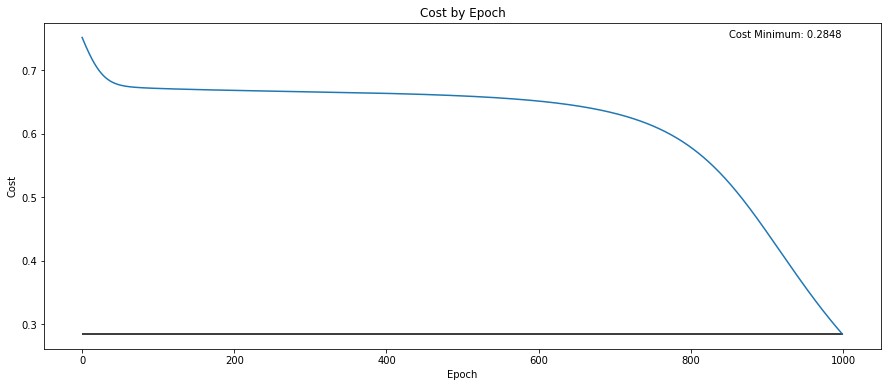

In [8]:
plt.figure(figsize = (15, 6))
plt.plot(cost)
plt.hlines(min(cost), 0, epoch)
plt.text(epoch - 150, max(cost), 'Cost Minimum: %.4f' % min(cost))
plt.title('Cost by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

## Create new data and re-run
Create new data and re-run from **Weights and Bias**.

In [9]:
X = np.random.binomial(1, 0.7, (100, 7))
y = np.random.binomial(1, 0.5, (X.shape[0], 1))

input_layer_size = X.shape[1]
hidden_layer_1_size = 5